# Лабораторная работа 5
## Численное интегрирование 
  
### Ходосевич Леонид Николаевич, студент группы А-05-20
Вариант 24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate 
import pandas as pd
sns.set_theme()

# Задача 5.1. 
Вычислить значение интеграла 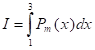 , где 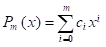
с помощью  квадратурных  **формул  левых прямоугольников** и по формуле индивидуального варианта - **формулы Вэддла** с точностью  0.01.   
Вычислить интеграл по формуле Гаусса.  
$P_n(x) = 6.6 - 3.7x - 8.4x^2 + 5.5x^3 + 15x^4$

In [2]:
#функции полинома, его 1 и 2 производной
def polynom(x):
    return 6.6 - 3.7*x - 8.4*x**2 + 5.5*x**3 + 15*x**4
def polynom_derivative(x):
    return -3.7 - 16.8*x + 16.5*x**2 + 60*x**3
def polynom_second_derivative(x):
    return -16.8 + 33*x + 180*x**2

In [3]:
#основне переменные для подсчетов
a, b = 1, 3
x = np.linspace(a, b, 1000)
h = x[1] - x[0]
epsilon = 10**(-2)
max_deriv = polynom_derivative(x).max()

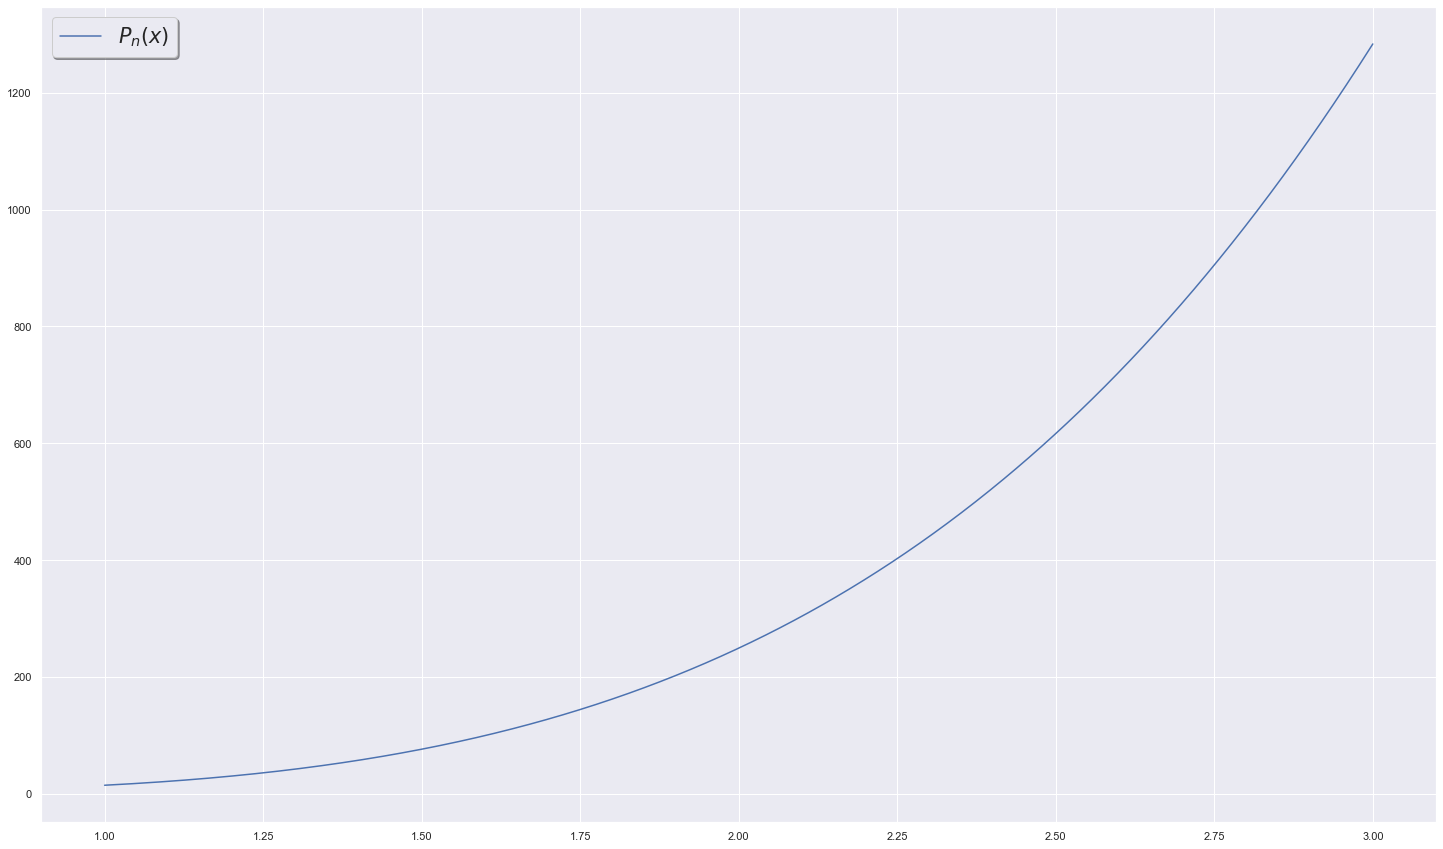

In [4]:
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax = ax.plot(x, polynom(x), label="$P_{n}(x)$")
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')

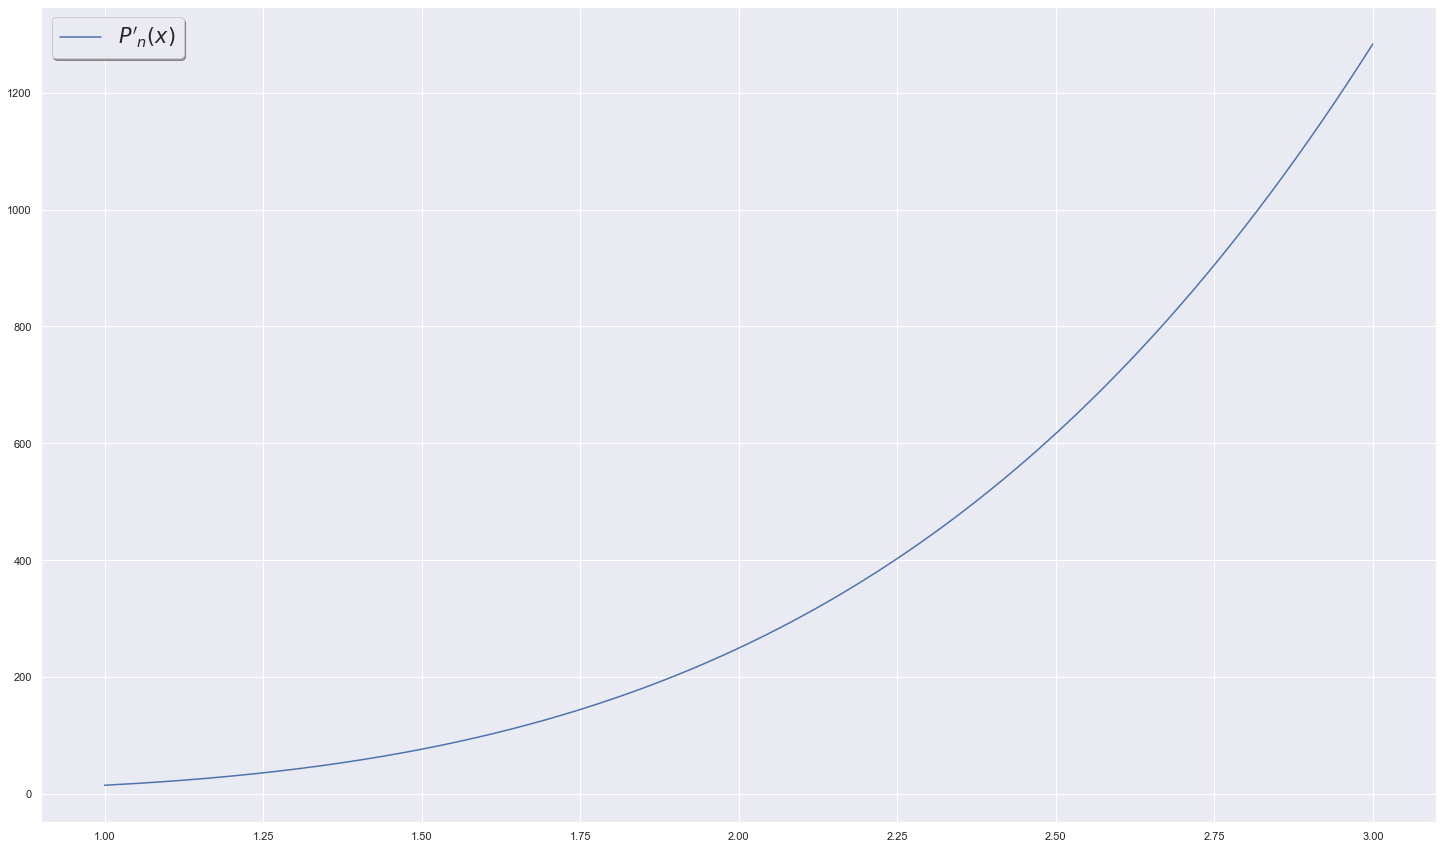

In [5]:
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax = ax.plot(x, polynom(x), label="$P'_{n}(x)$")
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')

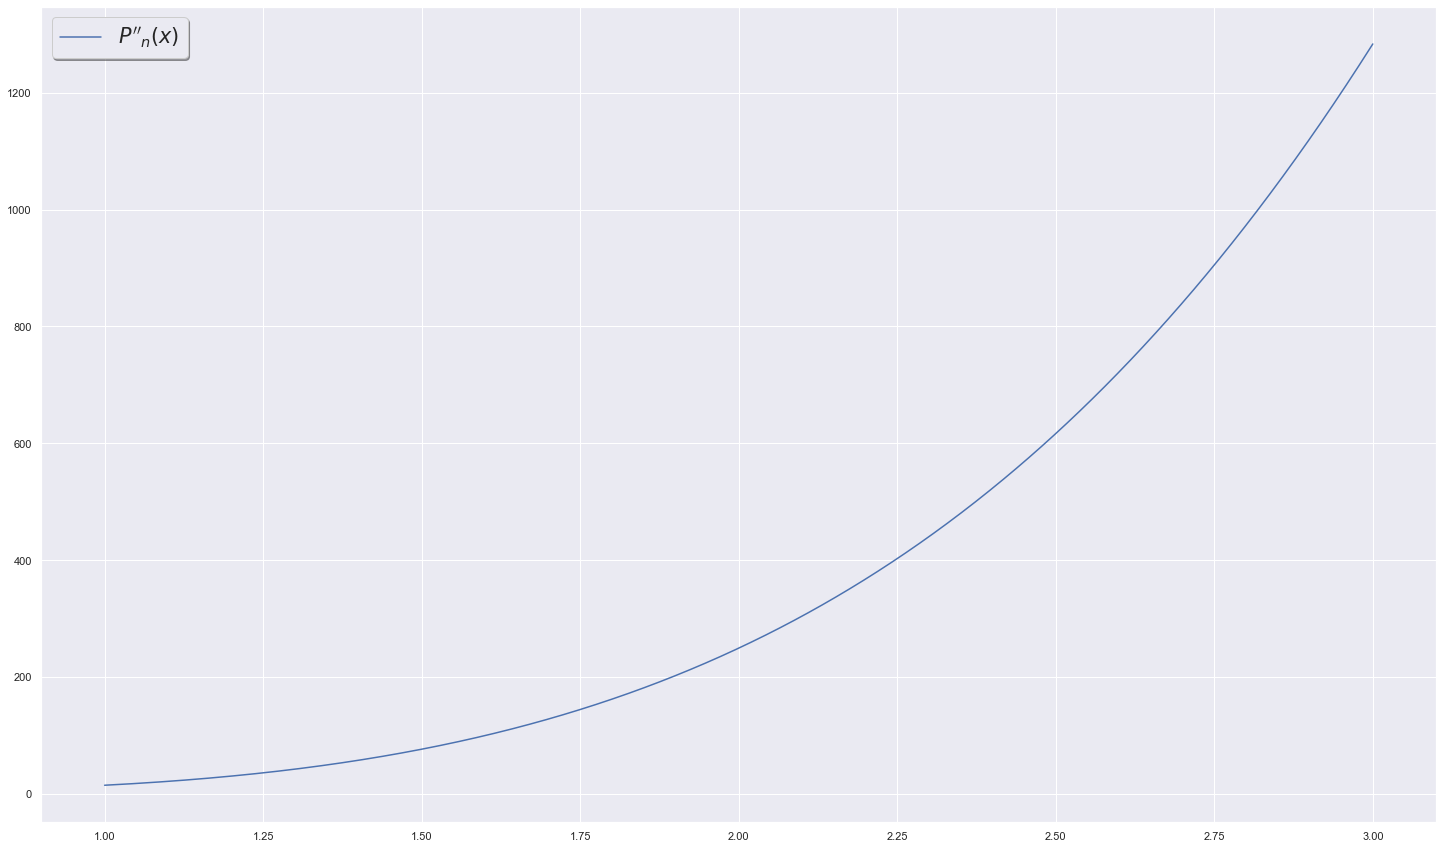

In [6]:
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax = ax.plot(x, polynom(x), label="$P''_{n}(x)$")
plt.legend(loc='upper left', shadow=True, fontsize='xx-large')

In [7]:
i_correct, pres = scipy.integrate.quad(polynom, 1, 3)
print('Точное значение интеграла I = ', i_correct)
print('Точность подсчетов: ', pres)

Точное значение интеграла I =  761.6000000000001
Точность подсчетов:  8.455458555545194e-12


**Подсчеты с помощью формул левых прямоугольников**

In [8]:
def left_rectangles(f, h):
    return h*(f.sum() - f[-1])

In [9]:
left_h = epsilon / (max_deriv*2/(b - a))
left_n = int((b - a) / left_h)
left_x = np.linspace(a, b, left_n - 1)
print(f'Требуемый шаг: {left_h}')
print(f'Требуемое количество точек: {left_n} ')

Требуемый шаг: 5.832944470368642e-06
Требуемое количество точек: 342880 


In [10]:
left_i = left_rectangles(polynom(left_x), left_h)
print(f'Полученное значение интеграла {left_i}')

Полученное значение интеграла 761.5918583808103


In [11]:
print(f'Разница с точным значением {abs(left_i - i_correct)}')

Разница с точным значением 0.008141619189814264


Точность достигнута

**Подсчеты с помощью формулы Вэддла**

In [12]:
def simple_veddle(f, h):
    result = 0
    result += 41*(f[0] + f[-1])
    result += 216*(f[1] + f[-2])
    result += 27*(f[2] + f[-3])
    result += 272*f[3]
    return result*h/840

In [13]:
veddle_h = 2
veddle_n = int((b - a) / veddle_h)
veddle_x = np.linspace(a, b, veddle_n + 6) # число 6 для вспомогательных точек

In [14]:
print(f'Требуемый шаг: {veddle_h}')
print(f'Требуемое количество точек: {veddle_n} ')
print(f'Полученное разбиение отрезка: {veddle_x}')

Требуемый шаг: 2
Требуемое количество точек: 1 
Полученное разбиение отрезка: [1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.        ]


In [15]:
veddle_i = simple_veddle(polynom(veddle_x), veddle_h)
print(f'Полученное значение интеграла {veddle_i}')

Полученное значение интеграла 761.5999999999999


In [16]:
print(f'Разница с точным значением {abs(veddle_i - i_correct)}')

Разница с точным значением 2.2737367544323206e-13


**Подсчеты с помощью формул Гаусса**

Так как полином 5 степени,  
то мы должны взять формулу Гаусса с 2N-1<=5, т.е с 3 узлами 

In [17]:
def hauss_3(func, a, b):
    return (b - a)/2 * (5/9*func((a+b)/2 + (b-a)/2*(-np.sqrt(3/5))) + \
                        8/9*func((a+b)/2 + 0) + \
                        5/9*func((a+b)/2 + (b-a)/2*(np.sqrt(3/5)))
                       )

In [18]:
hauss_i = hauss_3(polynom, a, b)
print(f'Полученное значение интеграла {hauss_i}')

Полученное значение интеграла 761.5999999999999


In [19]:
print(f'Разница с точным значением {abs(hauss_i - i_correct)}')

Разница с точным значением 2.2737367544323206e-13


Точность достигнута

**Итоговая таблица:**

In [20]:
print(f"ТОЧНОЕ ЗНАЧЕНИЕ ИНТЕГРАЛА \nI_точн = {i_correct}")

print(f"\nМетод Левых Прямоугольников".upper())
print(f"Количество точек n = {left_n}")
print(f"Шаг h = {left_h}")
print(f"Значение интеграла I_h = {left_i}")
print(f"Величина погрешности R_h = {max_deriv*(b - a)/2*left_h}")

print(f"\nМетод Вэддла".upper())
print(f"Количество точек n = {veddle_n}")
print(f"Шаг h = {veddle_h}")
print(f"Значение интеграла I_h = {veddle_i}")
print(f"Величина погрешности R_h = {0}")

print(f"\nМетод Гаусса".upper())
print(f"Количество узлов квадратуры N = {3}")
print(f"Значение интеграла I_G = {hauss_i}")

ТОЧНОЕ ЗНАЧЕНИЕ ИНТЕГРАЛА 
I_точн = 761.6000000000001

МЕТОД ЛЕВЫХ ПРЯМОУГОЛЬНИКОВ
Количество точек n = 342880
Шаг h = 5.832944470368642e-06
Значение интеграла I_h = 761.5918583808103
Величина погрешности R_h = 0.01

МЕТОД ВЭДДЛА
Количество точек n = 1
Шаг h = 2
Значение интеграла I_h = 761.5999999999999
Величина погрешности R_h = 0

МЕТОД ГАУССА
Количество узлов квадратуры N = 3
Значение интеграла I_G = 761.5999999999999


# Задача 5.2.   
Вычислить  интеграл 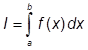 с точностью   
Функция:$f(x) = \frac{6sin(2x)}{x}$  
Отрезок интегрирования: [a, b] = [0.1, 5]  
Для подсчета будет использована формула Вэддла

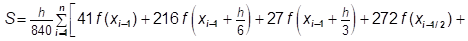 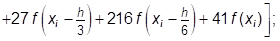
Остаточный член:
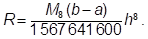

$f^{(8)}(x) = \frac{768((8x^7 - 84x^5 + 420x^3 - 630x)cos(2x) + (2x^8 - 28x^6 + 210x^4 - 630x^2 +315)sin(2 x))}{x^9} $

In [21]:
def function(x):
    return 6*np.sin(2*x)/x
def eight_derivative(x):
    return 768*((8*x**7 - 84*x**5 + 420*x**3 - 630*x)*np.cos(2*x) \
                + (2*x**8 - 28*x**6 + 210*x**4 - 630*x**2 + 315)*np.sin(2*x))/x**9

In [22]:
i_correct, pres = scipy.integrate.quad(function, 0.1, 5)
print('Точное значение интеграла I = ', i_correct)
print('Точность подсчетов: ', pres)

Точное значение интеграла I =  8.752749034155846
Точность подсчетов:  1.5768643783701172e-13


In [23]:
#основне переменные для подсчетов
a, b = 0.1, 5
x = np.linspace(a, b, 1000)
h = x[1] - x[0]
epsilon = 10**(-12)

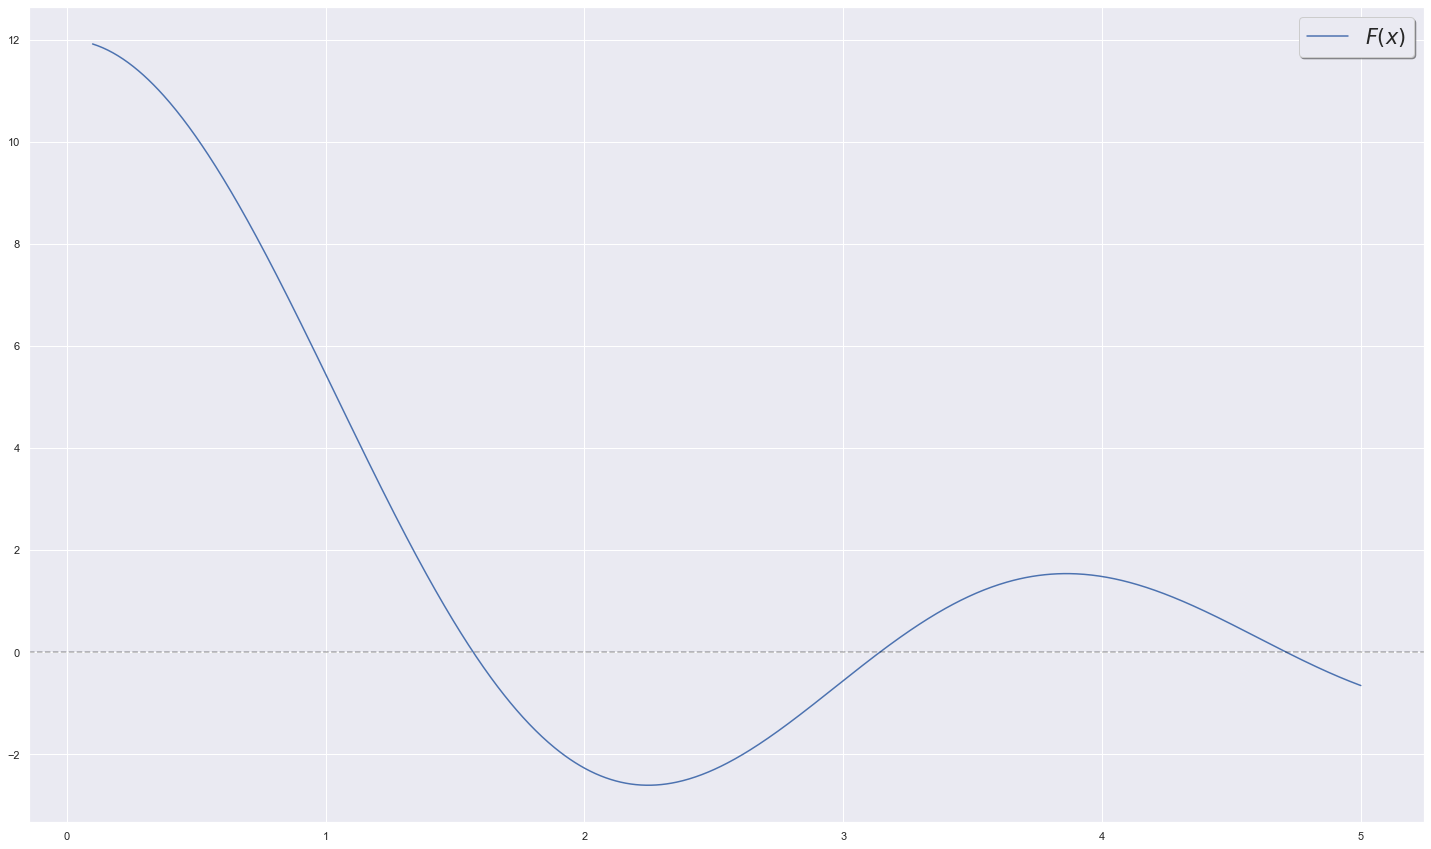

In [24]:
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax.plot(x, function(x), label="$F(x)$")
plt.legend(loc=0, shadow=True, fontsize='xx-large')
ax.axhline(0, c='black', alpha=0.3, ls='--')

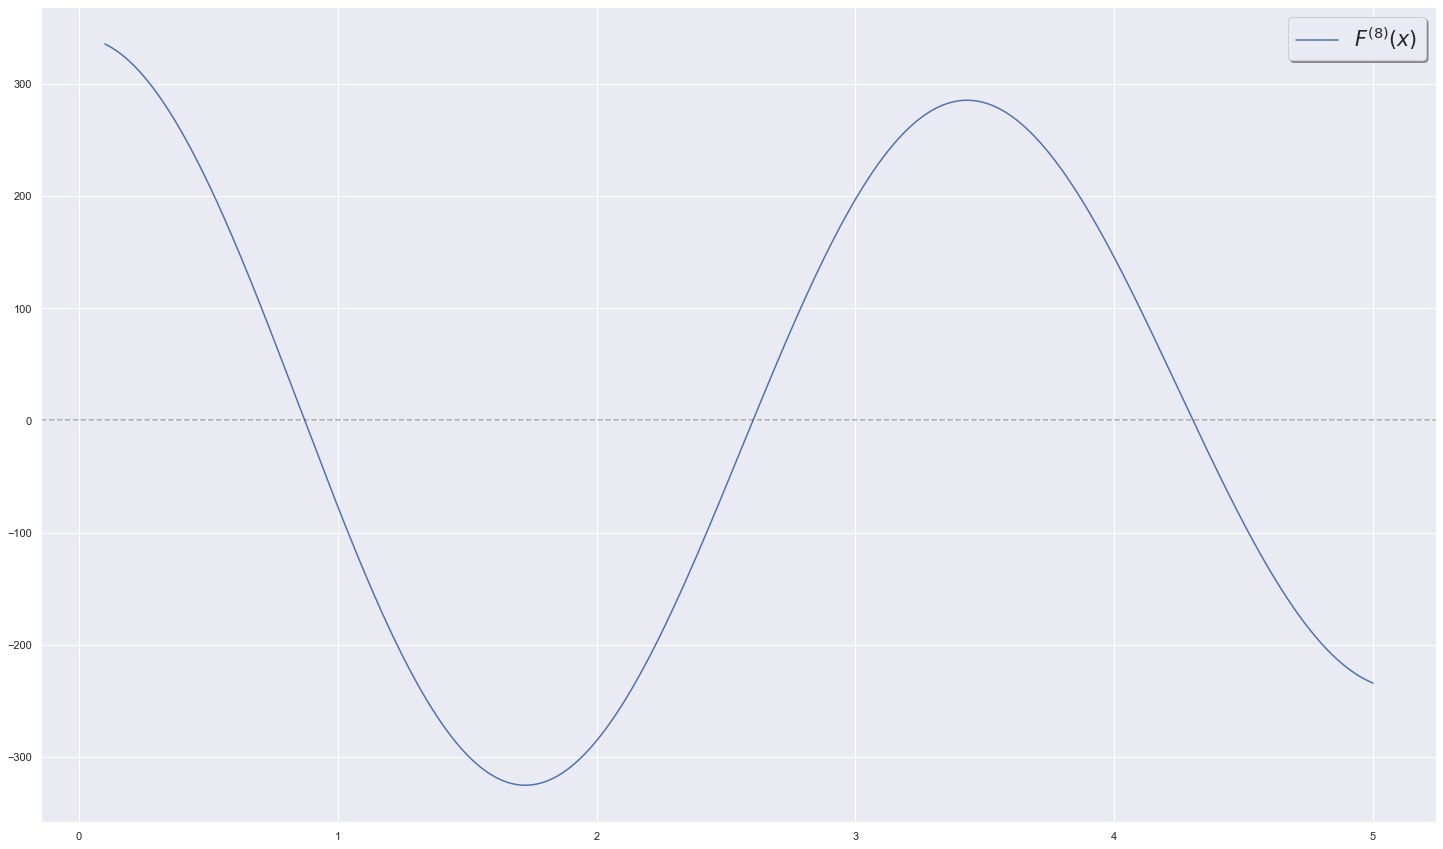

In [25]:
fig, ax = plt.subplots(1,1, figsize=(25,15))
ax.plot(x, eight_derivative(x), label="$F^{(8)}(x)$")
plt.legend(loc=0, shadow=True, fontsize='xx-large')
ax.axhline(0, c='black', alpha=0.3, ls='--')

In [26]:
def veddle(f, h):
    result = 0
    result += 41*(f[0:f.shape[0]-6:6].sum() + f[6::6].sum())
    result += 216*(f[1:f.shape[0]-1:6].sum() + f[5:f.shape[0]-1:6].sum())  
    result += 27*(f[2:f.shape[0]-1:6].sum() + f[4:f.shape[0]-1:6].sum())
    result += 272*f[3::6].sum()
    return result*h/840

Проверим полученную формулу с помощью оценки остаточного члена формулы Вэддла  
**(необязательный пункт для того чтобы удостовериться, что функция veddle работает)**

In [27]:
print(f'Максимум 8й производной на отрезке: { abs(eight_derivative(x)).max() }')
h = (epsilon*1567641600/abs(eight_derivative(x)).max()/(b - a))**(1/8)
n = round((b - a) / h)
h = (b - a) / n
x_1 = np.linspace(a, b, (n)*6 + 1) # всего для формулы Вэддла нужно (n - 1)*6 внутренних точек + 1 доп. внешняя
print(f'Требуемый шаг, с учетом требуемого количества точек: {h}')
print(f'Требуемое количество точек: {n} ')
print(f'Полученное разбиение отрезка:')
print(x_1)

Максимум 8й производной на отрезке: 335.76179703231884
Требуемый шаг, с учетом требуемого количества точек: 0.17500000000000002
Требуемое количество точек: 28 
Полученное разбиение отрезка:
[0.1        0.12916667 0.15833333 0.1875     0.21666667 0.24583333
 0.275      0.30416667 0.33333333 0.3625     0.39166667 0.42083333
 0.45       0.47916667 0.50833333 0.5375     0.56666667 0.59583333
 0.625      0.65416667 0.68333333 0.7125     0.74166667 0.77083333
 0.8        0.82916667 0.85833333 0.8875     0.91666667 0.94583333
 0.975      1.00416667 1.03333333 1.0625     1.09166667 1.12083333
 1.15       1.17916667 1.20833333 1.2375     1.26666667 1.29583333
 1.325      1.35416667 1.38333333 1.4125     1.44166667 1.47083333
 1.5        1.52916667 1.55833333 1.5875     1.61666667 1.64583333
 1.675      1.70416667 1.73333333 1.7625     1.79166667 1.82083333
 1.85       1.87916667 1.90833333 1.9375     1.96666667 1.99583333
 2.025      2.05416667 2.08333333 2.1125     2.14166667 2.17083333
 2.2  

In [28]:
i_h = veddle(function(x_1), h)
print(f'Полученное значение интеграла {i_h}')

Полученное значение интеграла 8.752749034155848


In [29]:
print(f'Разница с точным значением {abs(i_h - i_correct)}')

Разница с точным значением 1.7763568394002505e-15


Точность достигнута

**Теперь применим оценку точности с помощью правила Рунге**

In [33]:
i = 0
print(f"\nИТЕРАЦИЯ {i}")
n = 1
h = (b - a) / n
h_2 = h / 2
x_1 = np.linspace(a, b, (n)*6 + 1) # всего для формулы Вэддла нужно (n - 1)*6 внутренних точек + 1 доп. внешняя
x_2 = np.linspace(a, b, (n)*12 + 1) # всего для формулы Вэддла нужно (n - 1)*6 внутренних точек + 1 доп. внешняя
print(f'Требуемый шаг, с учетом требуемого количества точек: {h}')
print(f'Требуемое количество точек: {n} ')
i_h = veddle(function(x_1), h)
i_h_2 = veddle(function(x_2), h_2)
print(f'Полученное значение интеграла Ih {i_h} и Ih/2 {i_h_2}')
r_h_2 = abs((i_h_2 - i_h) / (2**8 - 1))
print(f'Полученный остаточный член по формуле Рунге: {r_h_2}')
while (abs(r_h_2) > epsilon):
    i+=1
    print(f"\nИТЕРАЦИЯ {i}")
    h = h / 2
    n = round((b - a) / h)
    h = (b - a) / n
    h_2 = h / 2
    print(f'Требуемый шаг, с учетом требуемого количества точек: {h}')
    print(f'Требуемое количество точек: {n} ')
    x_1 = np.linspace(a, b, (n)*6 + 1) # всего для формулы Вэддла нужно (n - 1)*6 внутренних точек + 1 доп. внешняя
    x_2 = np.linspace(a, b, (n)*12 + 1) # всего для формулы Вэддла нужно (n - 1)*6 внутренних точек + 1 доп. внешняя
    i_h = veddle(function(x_1), h)
    i_h_2 = veddle(function(x_2), h_2)
    r_h_2 = (i_h_2 - i_h) / (2**8 - 1)
    print(f'Полученное значение интеграла Ih {i_h} и Ih/2 {i_h_2}')
    print(f'Полученный остаточный член по формуле Рунге: {r_h_2}')


ИТЕРАЦИЯ 0
Требуемый шаг, с учетом требуемого количества точек: 4.9
Требуемое количество точек: 1 
Полученное значение интеграла Ih 8.725903753922326 и Ih/2 8.75273228106685
Полученный остаточный член по формуле Рунге: 0.00010520991037068102

ИТЕРАЦИЯ 1
Требуемый шаг, с учетом требуемого количества точек: 2.45
Требуемое количество точек: 2 
Полученное значение интеграла Ih 8.75273228106685 и Ih/2 8.752749055276633
Полученный остаточный член по формуле Рунге: 6.578121483516061e-08

ИТЕРАЦИЯ 2
Требуемый шаг, с учетом требуемого количества точек: 1.225
Требуемое количество точек: 4 
Полученное значение интеграла Ih 8.752749055276633 и Ih/2 8.752749034253362
Полученный остаточный член по формуле Рунге: -8.244419700308665e-11

ИТЕРАЦИЯ 3
Требуемый шаг, с учетом требуемого количества точек: 0.6125
Требуемое количество точек: 8 
Полученное значение интеграла Ih 8.752749034253362 и Ih/2 8.752749034156231
Полученный остаточный член по формуле Рунге: -3.809066352094341e-13


In [34]:
print(f'Итоговый шаг, с учетом требуемого количества точек: {h}')
print(f'Итоговое количество точек: {n} ')
print(f'Полученное значение интеграла Ih {i_h} и Ih/2 {i_h_2}')
print(f'Полученный остаточный член по формуле Рунге: {r_h_2}')
print(f'Уточненное значение интеграла по формуле Рунге: {i_h_2 + r_h_2}')
print(f'\nРазность точного значения и НЕ уточненного значения интеграла по формуле Рунге: {i_h_2 - i_correct}')
print(f'Разность точного значения и уточненного значения интеграла по формуле Рунге: {i_h_2 + r_h_2 - i_correct}')

Итоговый шаг, с учетом требуемого количества точек: 0.6125
Итоговое количество точек: 8 
Полученное значение интеграла Ih 8.752749034253362 и Ih/2 8.752749034156231
Полученный остаточный член по формуле Рунге: -3.809066352094341e-13
Уточненное значение интеграла по формуле Рунге: 8.752749034155851

Разность точного значения и НЕ уточненного значения интеграла по формуле Рунге: 3.8546943414985435e-13
Разность точного значения и уточненного значения интеграла по формуле Рунге: 5.329070518200751e-15


Как видим, применение экстраполяции Ричардсона значительно повышает точность расчетов.  
